# MNIST

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Train model

In [ ]:
!pip install tensorflow --upgrade

In [ ]:
import numpy as np

import tensorflow.keras as keras
mnist = keras.datasets.mnist

from keras import layers
from keras.models import Sequential

Wczytujemy dataset MNIST. Następnie dzielimy zbiór na zestawy treningowe i testowe. Aby przygotować dane do modelu, obrazy są normalizowane poprzez skalowanie wartości pikseli z zakresu 0-255 do zakresu 0-1. Następnie rozmiar tablic obrazów jest rozszerzany o jeden wymiar i przekształcamy etykiety klas do postaci macierzy binarnych za pomocą funkcji to_categorical.

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
try:
  model = keras.models.load_model('/content/drive/MyDrive/SSN/mnist_model')
except:
  model = keras.Sequential(
      [
          keras.Input(shape=input_shape),
          layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
          layers.MaxPooling2D(pool_size=(2, 2)),
          layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
          layers.MaxPooling2D(pool_size=(2, 2)),
          layers.Flatten(),
          layers.Dropout(0.5),
          layers.Dense(num_classes, activation="softmax"),
      ]
  )

  batch_size = 128
  epochs = 15

  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

  model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

  model.save('/content/drive/MyDrive/SSN/mnist_model')

Epoch 1/15
422/422 [==============================] - 4s 7ms/step - loss: 0.3805 - accuracy: 0.8835 - val_loss: 0.0944 - val_accuracy: 0.9720
Epoch 2/15
422/422 [==============================] - 2s 6ms/step - loss: 0.1124 - accuracy: 0.9652 - val_loss: 0.0625 - val_accuracy: 0.9842
Epoch 3/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0833 - accuracy: 0.9741 - val_loss: 0.0464 - val_accuracy: 0.9875
Epoch 4/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0708 - accuracy: 0.9780 - val_loss: 0.0419 - val_accuracy: 0.9897
Epoch 5/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0622 - accuracy: 0.9806 - val_loss: 0.0403 - val_accuracy: 0.9880
Epoch 6/15
422/422 [==============================] - 2s 5ms/step - loss: 0.0583 - accuracy: 0.9819 - val_loss: 0.0358 - val_accuracy: 0.9898
Epoch 7/15
422/422 [==============================] - 3s 7ms/step - loss: 0.0535 - accuracy: 0.9830 - val_loss: 0.0361 - val_accuracy: 0.9897
Epoch 

## SHAP

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.7 MB/s eta 0:00:00


In [ ]:
import shap

 Tworzymy obiekt explainer, który jest gotowy do interpretowania naszego modelu za pomocą wartości SHAP, obliczanych na podstawie gradientów modelu.

In [ ]:
# Create a SHAP explainer
explainer = shap.GradientExplainer(model, x_train[:512])


Analizujemy dane testowe z zestawu danych MNIST (zbiór obrazów ręcznie pisanych cyfr od 0 do 9). Najpierw wyszukujemy i zapisujemy indeksy pierwszego przykładu każdej klasy (cyfry od 0 do 9) w danych testowych.

Następnie, dla każdej klasy, obliczamy prawdopodobieństwa klas dla wybranego obserwacji (obrazu), drukujemy informacje o prawdziwej klasie obrazu oraz przewidywane prawdopodobieństwo, a następnie obliczamy i rysujemy wartości SHAP dla tej obserwacji. Wartości SHAP są wykorzystywane do interpretacji modelu, pokazując, jak poszczególne piksele obrazu wpływają na przewidywanie modelu.*kursywa*

1/1 [==============================] - 0s 24ms/step
Class: 0, True Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Predicted Probability: 0.9999


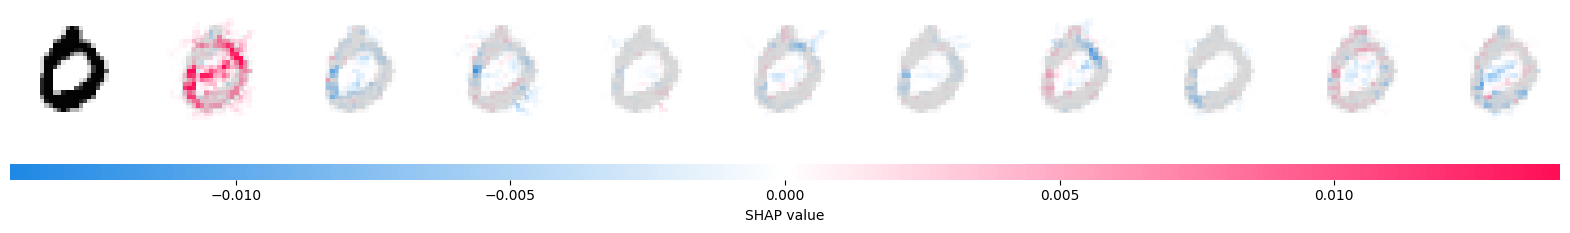

1/1 [==============================] - 0s 19ms/step
Class: 1, True Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], Predicted Probability: 0.9998


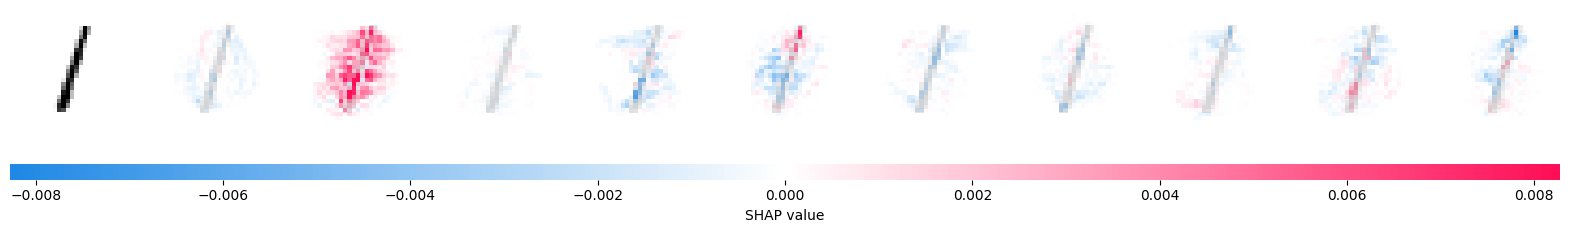

1/1 [==============================] - 0s 20ms/step
Class: 2, True Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.], Predicted Probability: 1.0000


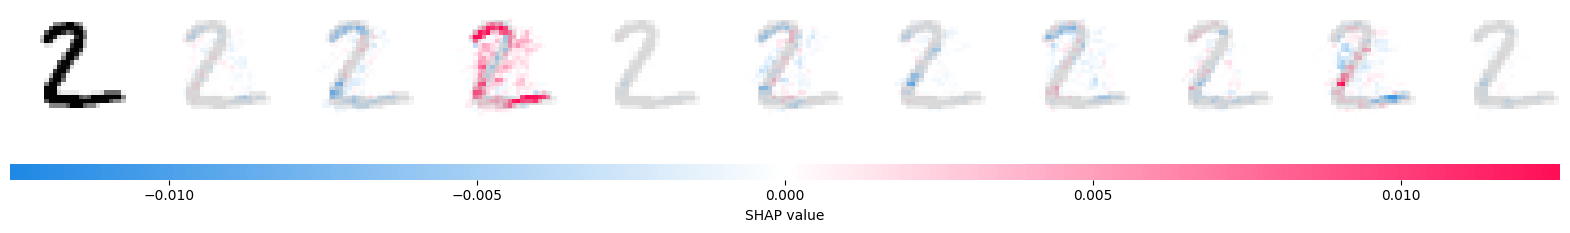

1/1 [==============================] - 0s 19ms/step
Class: 3, True Label: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.], Predicted Probability: 0.4164


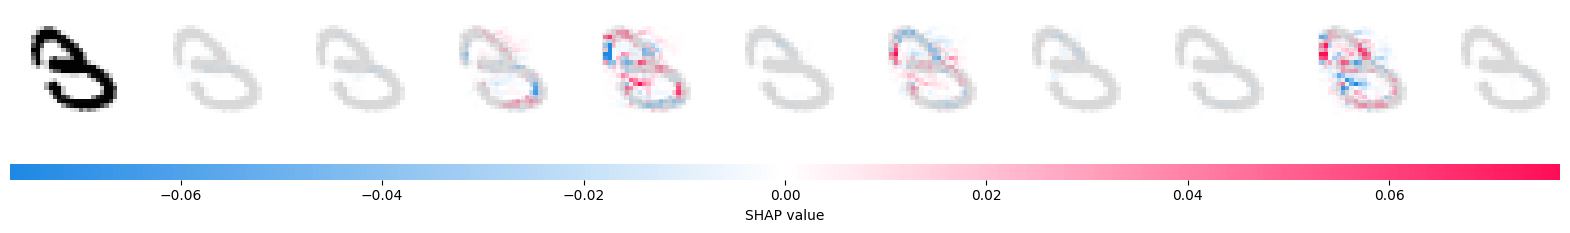

1/1 [==============================] - 0s 25ms/step
Class: 4, True Label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], Predicted Probability: 1.0000


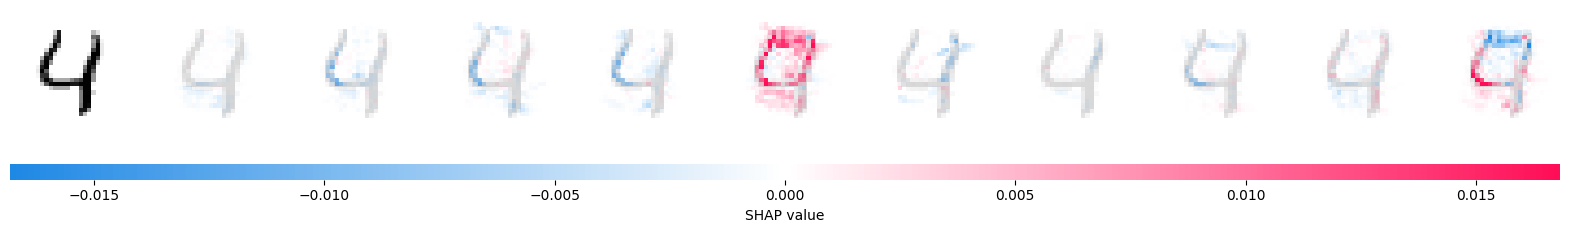

1/1 [==============================] - 0s 19ms/step
Class: 5, True Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], Predicted Probability: 0.9493


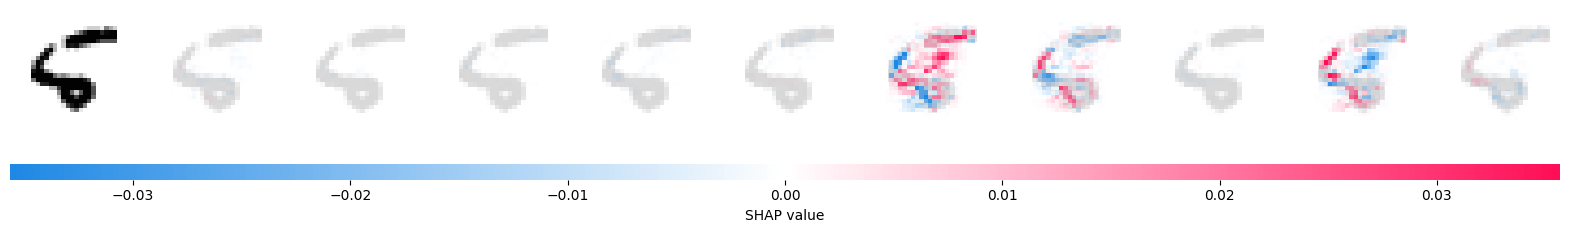

1/1 [==============================] - 0s 19ms/step
Class: 6, True Label: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], Predicted Probability: 1.0000


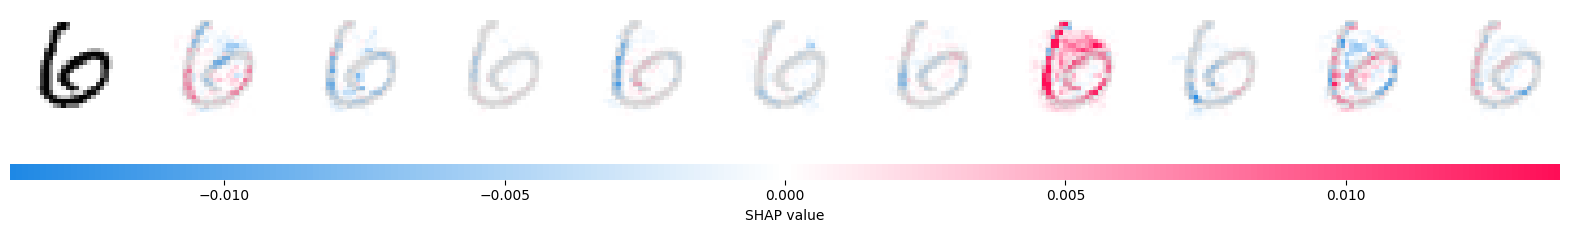

1/1 [==============================] - 0s 31ms/step
Class: 7, True Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], Predicted Probability: 1.0000


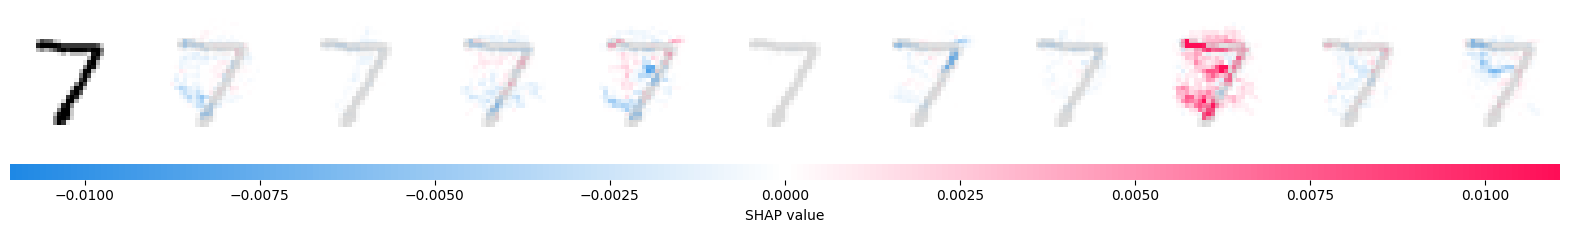

1/1 [==============================] - 0s 27ms/step
Class: 8, True Label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], Predicted Probability: 1.0000


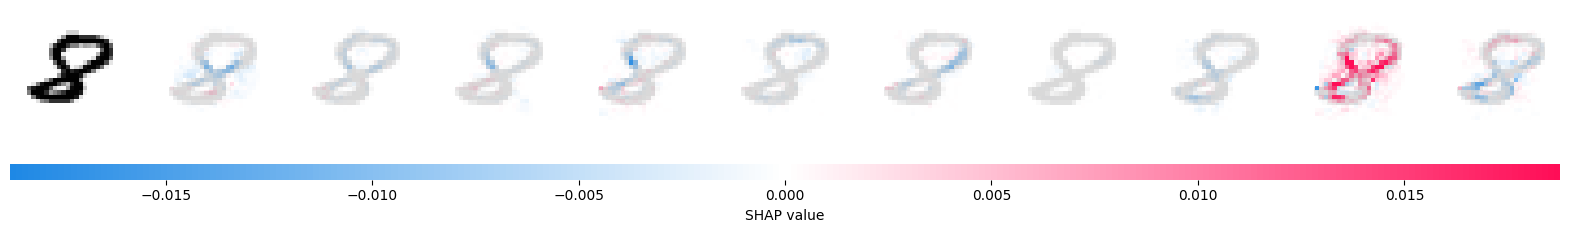

1/1 [==============================] - 0s 19ms/step
Class: 9, True Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], Predicted Probability: 0.9997


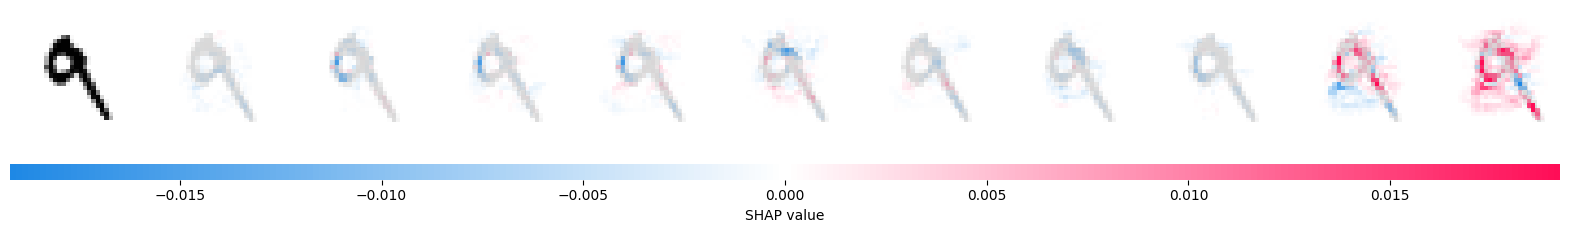

In [ ]:
# Class names for the MNIST dataset
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

# Initialize a list to hold one index for each class
class_indices = [None]*num_classes

# Extract the class labels from the test set
test_labels = np.argmax(y_test, axis=1)

# Iterate over the test set until we find an example for each class
for i, label in enumerate(test_labels):
    # If we haven't recorded an example for this class yet, record this one
    if class_indices[label] is None:
        class_indices[label] = i
    # If we have recorded an example for every class, stop searching
    if None not in class_indices:
        break

# For each class
for i, class_idx in enumerate(class_indices):
    # Select the observation for this class
    observation = x_test[class_idx:class_idx+1]

    # Compute the class probabilities for this observation
    class_probabilities = model.predict(observation)[0]

    # Print class, true label and predicted probability
    print(f"Class: {i}, True Label: {y_test[class_idx]}, Predicted Probability: {class_probabilities[i]:.4f}")

    # Compute SHAP values for this observation
    shap_values = explainer.shap_values(observation)

    # Plot the SHAP values for this observation using a heatmap
    shap.image_plot(shap_values, -observation)


## LIME

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=48c87367641c0f53e51ffe7bdbfe097b50656a3bf15a719e5717870e2e13e1fa
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


Podobnie jak w przypadku ze zbiorem Iris, został utworzony explainer, tym razem służący do wyjaśniania istotności zdjęć.

In [ ]:
import matplotlib.pylab as plt
from lime import lime_image
from skimage.color import gray2rgb
from skimage.color import rgb2gray
explainer = lime_image.LimeImageExplainer()

Wybór obrazka (16), który posłuży nam jako przykład oraz przekształcenie go do skali RGB - explainer techniki LIME korzysta z obrazów o trzech kanałach barwnych.

In [ ]:
# Pick the observation in the validation set for which explanation is required
observation_idx = 16
observation = x_test[observation_idx]


observation_rgb = gray2rgb(observation)
observation_rgb = np.squeeze(observation_rgb, axis=2)

Konieczne jest stworzenie własnej funkcji do predycji, ponieważ model przyjmuje obraz w skali szarości. Z tego powodu funkcja ta przekształca obraz powrotnie do skali szarości i wykonuje predykcję.

Następnie wywołana zostaje funkcja explainera służąca do wyjaśnienia istotności cech. Jako parametr podajemy 10 cech (wszystkie cyfry od 0 do 9).

In [ ]:
def model_predict_rgb(img):
    # Convert the image back to grayscale
    img_gray = rgb2gray(img)

    # Expand the dimensions to add the channel dimension
    img_gray = np.expand_dims(img_gray, -1)

    return model.predict(img_gray)

explanation = explainer.explain_instance(observation_rgb, model_predict_rgb, top_labels=10, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 39ms/step


Po wykonaniu operacji przy użyciu explainera, uzyskujemy dane, które następnie nanosimy na odpowiednie wykresy.

Jako pierwszy przedstawiony zostaje wykres prezentujący obszary na obrazku oraz ich istotność w przypisaniu obrazka do danej cechy (czyli zakwalifikowanie go do jednej z cyfr).

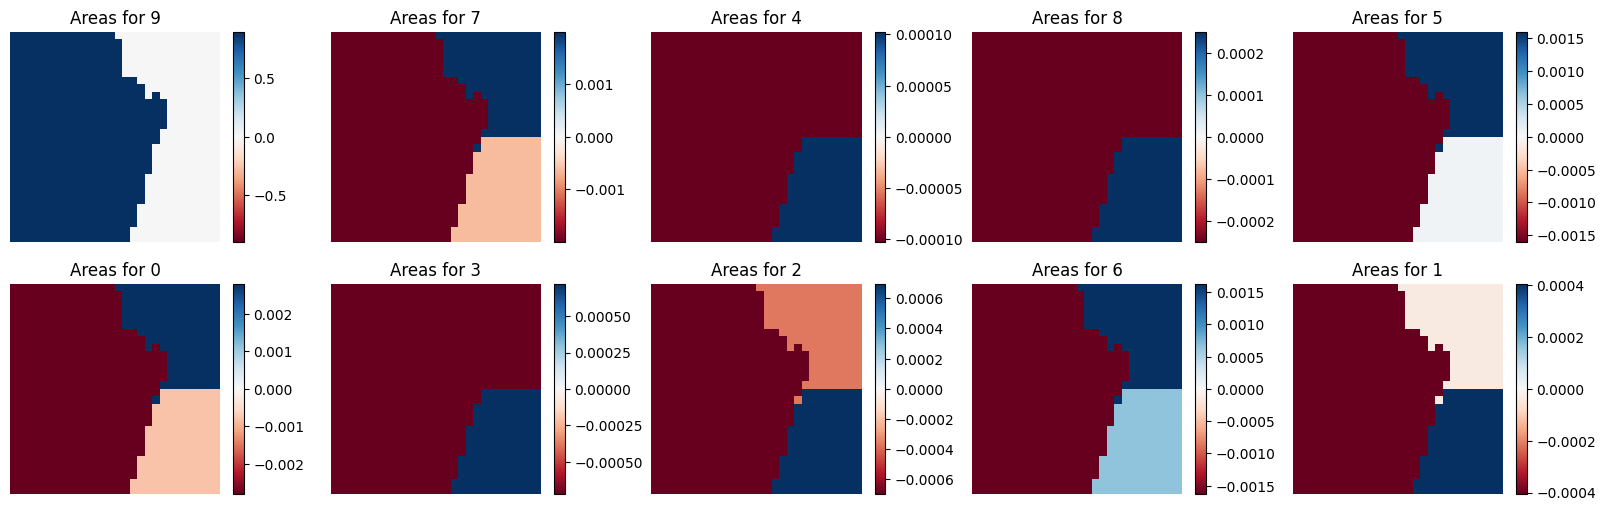

In [ ]:
ind =  explanation.top_labels[0:10]

fig, m_axs = plt.subplots(2,5, figsize = (20,6))
for i, c_ax in enumerate(m_axs.flatten()):
    dict_heatmap = dict(explanation.local_exp[ind[i]])
    heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)
    temp, mask = explanation.get_image_and_mask(i, positive_only=True, num_features=10, hide_rest=False, min_weight = 0.01 )
    im = c_ax.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
    plt.colorbar(im, ax=c_ax)
    c_ax.set_title('Areas for {}'.format(ind[i]))
    c_ax.axis('off')
plt.show()


Następnie, wyznaczone obszary nanosimy na obraz i oznaczamy je dwoma kolorami - niebieski oznacza obszar, który wpływa pozytywnie na przypisanie do danej cechy, zaś czerwony negatywnie (lub jak w przypadku cechy 9 wcale nie wpływa).

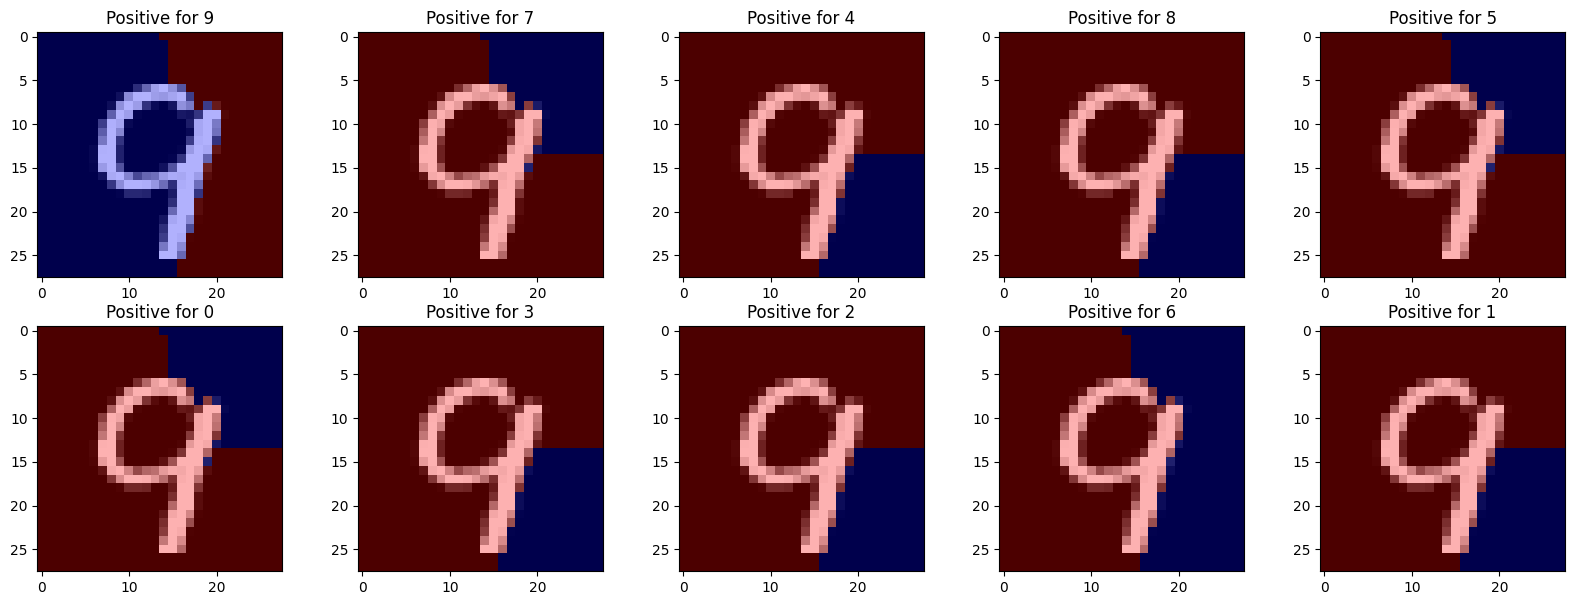

In [ ]:
from skimage.color import gray2rgb, rgb2gray, label2rgb

fig, m_axs = plt.subplots(2,5, figsize = (20,7))
for i, c_ax in enumerate(m_axs.flatten()):
  temp, mask = explanation.get_image_and_mask(explanation.top_labels[i], positive_only=True, num_features=1000, hide_rest=False, min_weight = 0.0001 )
  c_ax.imshow(label2rgb(-(3-mask),observation_rgb, bg_label = 0), interpolation = 'nearest')
  c_ax.set_title('Positive for {}'.format(ind[i]))
plt.show()


Jako ostatnie wyświetlamy granice "najbardziej wpływowych" obszarów.

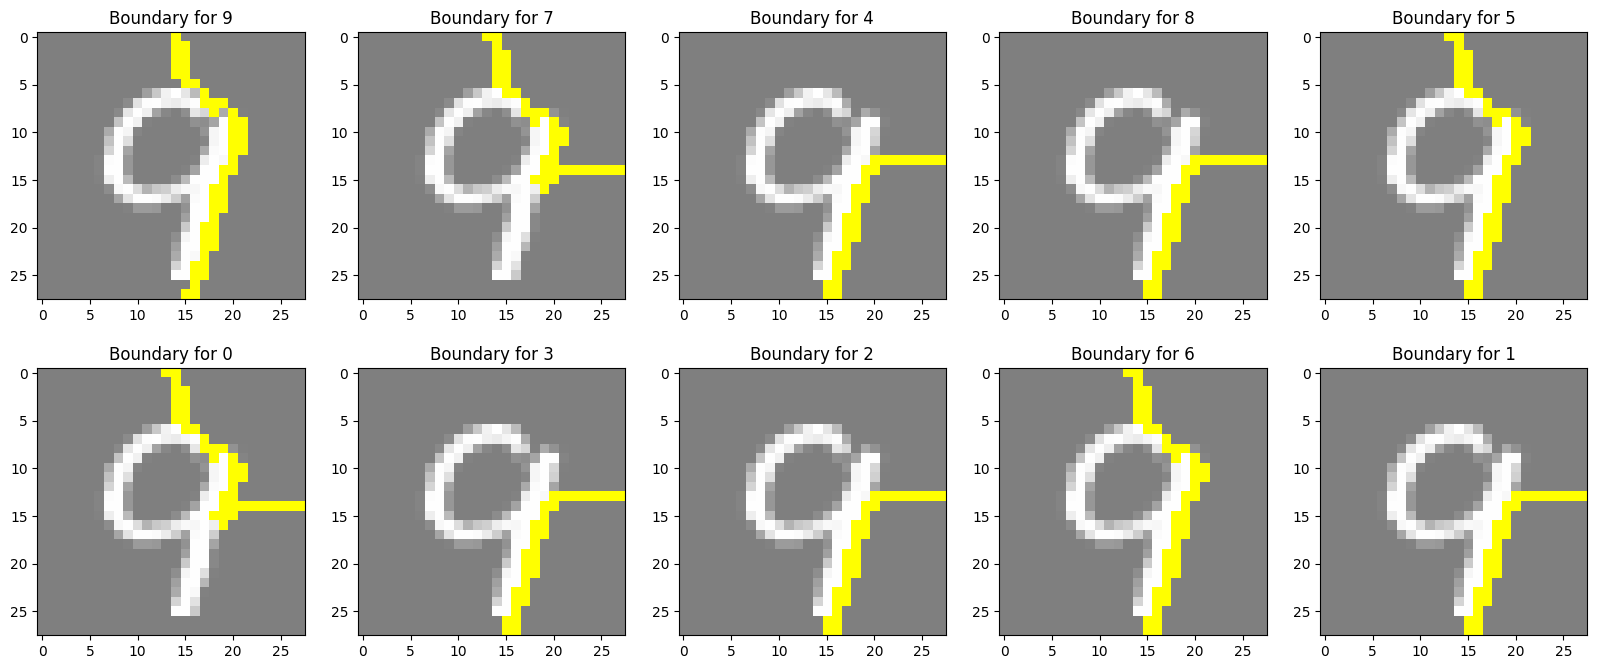

In [ ]:
from skimage.segmentation import mark_boundaries
fig, m_axs = plt.subplots(2,5, figsize = (20,8))
for i, c_ax in enumerate(m_axs.flatten()):
  temp, mask = explanation.get_image_and_mask(explanation.top_labels[i], positive_only=True, num_features=1000, hide_rest=False)
  c_ax.imshow(mark_boundaries(temp / 2 + 0.5, mask))
  c_ax.set_title('Boundary for {}'.format(ind[i]))
plt.show()

## SALib

SALib to otwarta biblioteka napisana w Pythonie do przeprowadzania analiz wrażliwości. SALib zapewnia odseparowany przepływ pracy, co oznacza, że nie łączy się bezpośrednio z modelem matematycznym lub obliczeniowym.

Zamiast tego, SALib jest odpowiedzialny za generowanie wejść modelu, przy użyciu jednej z funkcji próbkowania, oraz obliczanie wskaźników wrażliwości na podstawie wyjść modelu, przy użyciu jednej z funkcji analizy.

In [ ]:
!pip install SALib

In [ ]:
!pip install numpy

Poniżej definiujemy tzw. problem, czyli parametry przekazywane do funkcji wykonującej analizę.

W tym przypadku oczekujemy wrażliwości każdego piksela na ostateczną predykcję, dlatego liczba parametrów (`num_vars`) wynosi 784. Każdy parametr jest oznaczony swoim numerem. Zakres wartości `bounds` dla wszystkich pikseli jest jednakowy - wynosi on od 0 do 1, ponieważ dane są znormalizowane.

In [ ]:
problem = {
    "num_vars": 784,
    "names": [f"pixel_{i}" for i in range(784)],
    "bounds": [[0.0, 1.0] for _ in range(784)]
}

In [ ]:
from SALib.sample.sobol import sample
from SALib.analyze.sobol import analyze

Liczbę próbek Sobolowskich określamy na 64. Jedna próbka przygotowuje przynajmniej dwukrotność liczby parametrów próbkowania - w tym przypadku ostatecznie 1570.

Każdy obraz ma rozmiar 28x28, stąd ostateczny rozmiar analizowanych danych dla 64 próbek wynosi:
`1570 * 64 * 28 * 28` pikseli.

Na koniec wypisywane są wskaźnki pierwszego i całkowitego rzędu (dla każdego piksela).

In [ ]:
n_samples = 64
samples = sample(problem, n_samples)
print(f"{samples.shape=}")

param_values_reshaped = samples.reshape((1570 * n_samples, 28, 28, 1))
print(f"{param_values_reshaped.shape=}")

Y = model.predict(param_values_reshaped)

sobol_indices = analyze(problem, Y.flatten())

for i, var_name in enumerate(problem["names"]):
  print(f"{var_name}: "
  f"First-order index={sobol_indices['S1'][i]}, "
  f"Total index={sobol_indices['ST'][i]}")

samples.shape=(100480, 784)
param_values_reshaped.shape=(100480, 28, 28, 1)
3140/3140 [==============================] - 6s 2ms/step
pixel_0: First-order index=1.4047232713149316, Total index=0.03017133884487633
pixel_1: First-order index=-63.15914048760709, Total index=60.05121587820771
pixel_2: First-order index=-0.9258617054920193, Total index=0.051030702839387196
pixel_3: First-order index=0.13629624424640865, Total index=0.049658879942559714
pixel_4: First-order index=0.32784420107844203, Total index=0.022948411035580513
pixel_5: First-order index=-5.064271599959687, Total index=0.3198320518608118
pixel_6: First-order index=1.3745950724231004, Total index=0.029076926606066533
pixel_7: First-order index=-806.6004898654264, Total index=4018.8373344450574
pixel_8: First-order index=-4.8573615793666995, Total index=0.9776746339735566
pixel_9: First-order index=-0.004641484558309936, Total index=0.00012245404818414009
pixel_10: First-order index=1.4047365959436262, Total index=0.030171

Poniżej znajduje się prosty kod do przygotowania i wyświetlenia otrzymanych wyników.

784


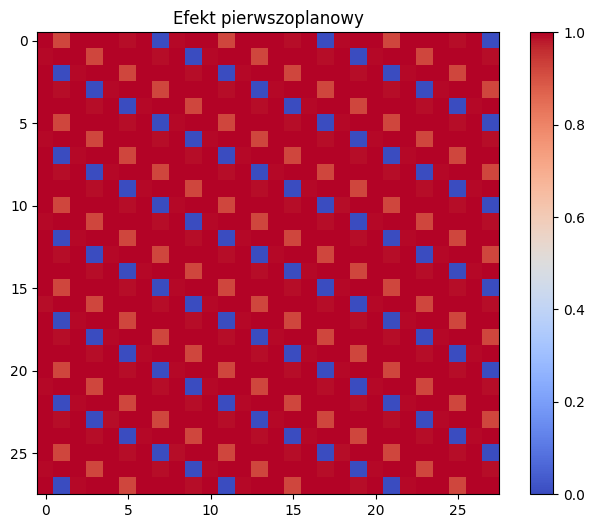

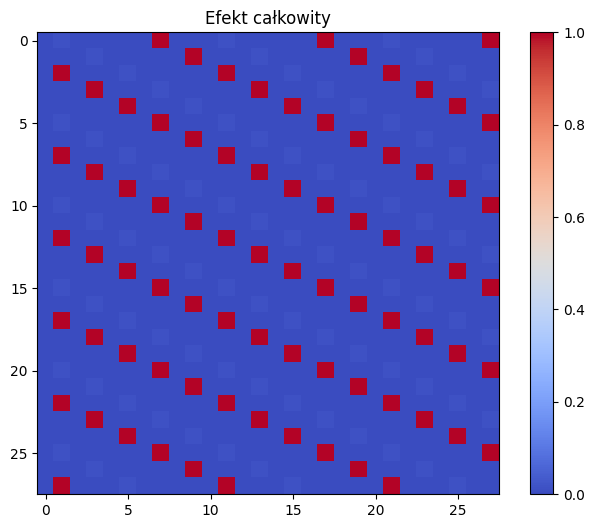

In [ ]:
import matplotlib.pyplot as plt

print(len(sobol_indices["S1"]))


def normalize(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))


si = np.reshape(normalize(sobol_indices["S1"]), (28, 28))
st = np.reshape(normalize(sobol_indices["ST"]), (28, 28))

# Wyświetlenie efektu pierwszoplanowego
plt.figure(figsize=(8, 6))
plt.imshow(si, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.title("Efekt pierwszoplanowy")
plt.show()

# Wyświetlenie efektu całkowitego
plt.figure(figsize=(8, 6))
plt.imshow(st, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.title("Efekt całkowity")
plt.show()

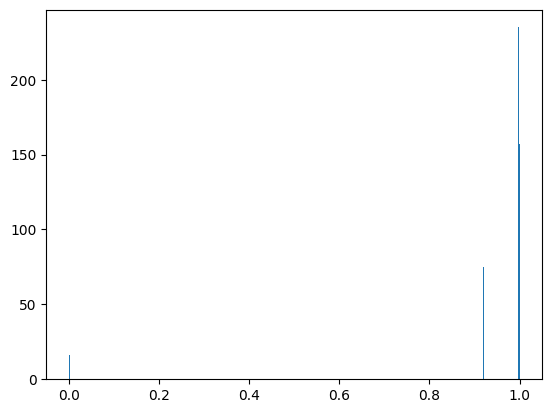

In [ ]:
plt.hist(normalize(sobol_indices["S1"]), bins=784)
plt.show()